## Observations and Insights

Markdown 
LaTeX:  𝛼2

## Dependencies and starter code

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Check the mouse data 
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Check the study results data
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


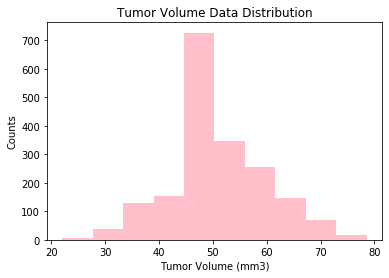

Mean is: 50.45
Median is: 48.95
Mode is: 0    45.0
dtype: float64
NormaltestResult(statistic=1.3624765385765822, pvalue=0.5059900523434122)


In [5]:
# Creating a histogram to see if it is normally distributed
plt.hist(study_results['Tumor Volume (mm3)'], color='pink')

plt.title('Tumor Volume Data Distribution')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Counts')

plt.show()

print(f"Mean is: {round(study_results['Tumor Volume (mm3)'].mean(),2)}")
print(f"Median is: {round(study_results['Tumor Volume (mm3)'].median(),2)}")
print(f"Mode is: {round(study_results['Tumor Volume (mm3)'].mode(),2)}")
print(st.normaltest(study_results['Tumor Volume (mm3)'].sample(100)))

In [6]:
# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, how="left", on = 'Mouse ID')
print(merge_data.shape)
merge_data.head()

(1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Check to see if there are any rows with missing data
merge_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [8]:
# Remove the rows with missing data
merge_data = merge_data.dropna(how="any")
merge_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [9]:
# Examining datatypes within the DataFrame
merge_data.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [10]:
# Display a statistical overview
merge_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


# Summary statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen
statistics_df = merge_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': [ 'mean', 'median', 'var', 'std', 'sem' ]})    
statistics_df = statistics_df.rename(columns={
    "mean": "Mean", "median": "Median", "var": "Variance", "std": "Standard Deviation", "sem": "SEM"
})
statistics_df

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.322552  50.854632  42.351070           6.507770   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.512884  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar plots

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Display an overview of the Drug Regimen column

treatment_counts =  merge_data['Drug Regimen'].value_counts()
treatment_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

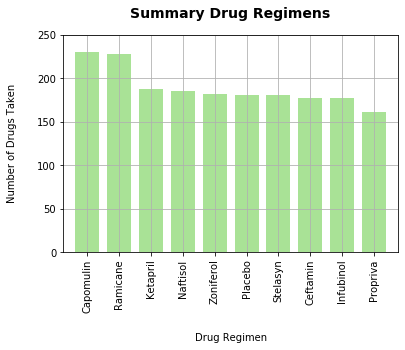

In [13]:
# Generate a bar plot using Pandas's DataFrame.plot()
pd_bar = treatment_counts.plot(kind="bar", facecolor=(0.55, 0.85, 0.45), alpha=0.75, width = 0.75, align="center")

# Create labels for the title, X and Y axis
plt.title('Summary Drug Regimens', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel("Drug Regimen", labelpad=20)
plt.ylabel("Number of Drugs Taken",  labelpad=20)

# Set your x and y limits
plt.xlim(-0.75, len(treatment_counts)-0.25)
plt.ylim(0, max(treatment_counts)+20)

# Set a grid on the plot
plt.grid()

# Display the plot
plt.show()

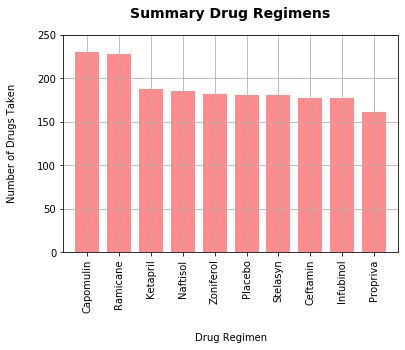

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
gr_df = merge_data.groupby("Drug Regimen", as_index=False).count()
gr_df = gr_df.sort_values(by=['Timepoint', 'Drug Regimen'], ascending=[False, True])


# total volumes for df
total_mouse = merge_data["Mouse ID"].unique()
total_drug = merge_data["Drug Regimen"].unique()
total_time = merge_data["Timepoint"].unique()

# Generate a bar plot using Matplotlib's pyplot
mt_bar = plt.bar(gr_df['Drug Regimen'], gr_df['Timepoint'], color='r', alpha=0.45, width = 0.75, align="center")

# Tell matplotlib rotation of our x axis headers
plt.xticks(rotation=90)

# Sets the x limits  and y limits of the current chart
plt.xlim(-0.75, len(gr_df['Drug Regimen'])-0.25)
plt.ylim(0, max(treatment_counts)+20)

# Give our chart some labels and a tile
plt.title('Summary Drug Regimens', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel("Drug Regimen", labelpad=20)
plt.ylabel("Number of Drugs Taken",  labelpad=20)

# Set a grid on the plot
plt.grid()

# Display the plot
plt.show()

## Pie plots

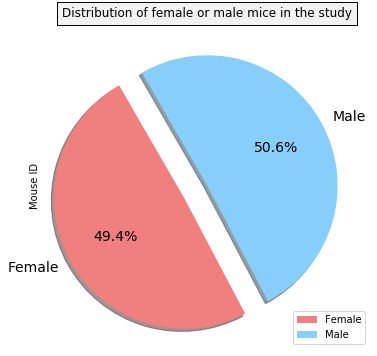

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gr_by_sex_df = merge_data.groupby('Sex').count()
# print(gr_by_sex_df['Mouse ID'])

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.2, 0)

pd_pie = gr_by_sex_df.plot(kind='pie', y='Mouse ID',  figsize=(6, 6), autopct='%1.1f%%', colors=colors, explode=explode,  
 startangle=120, shadow=True, fontsize=14)

# creates a legend
plt.legend(loc="lower right")

plt.title("Distribution of female or male mice in the study", bbox={'facecolor':'0.95', 'pad':5})
plt.show()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gr_by_sex_df = merge_data.groupby('Sex').count()
print(gr_by_sex_df['Mouse ID'])
print(gr_by_sex_df.index)

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64
Index(['Female', 'Male'], dtype='object', name='Sex')


In [17]:
# Labels for the sections of our pie chart
labels = gr_by_sex_df.index
print(labels)

# The values of each section of the pie chart
sizes = gr_by_sex_df['Mouse ID']

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.2, 0.0)

Index(['Female', 'Male'], dtype='object', name='Sex')


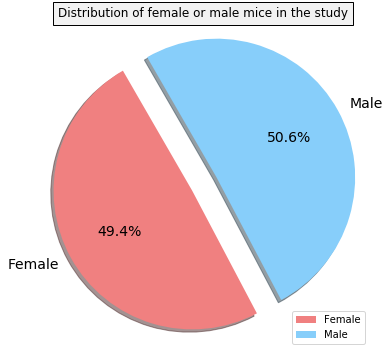

In [18]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, startangle=120, shadow=True, textprops={'fontsize': 14})

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# To change the size of your pie chart/figure
fig = plt.gcf()
fig.set_size_inches(6,6)

# creates a legend
plt.legend(loc="lower right")

plt.title("Distribution of female or male mice in the study", bbox={'facecolor':'0.95', 'pad':5})
plt.show()

## Quartiles, outliers and boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin.


In [20]:
# Starting by getting the last (greatest) timepoint for each mouse
max_tumor = merge_data.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(merge_data,on=['Mouse ID','Timepoint'],how="left")

print(merged_data.shape)
merged_data.head()

(249, 8)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [21]:
#  Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs_list = ['Capomulin', 'Ramicane','Infubinol', 'Ceftamin' ]

# Using newly created merged_data to find four drugs.
# Pandas DataFrame.isin() method helps in selecting rows with having a particular(or Multiple)
# value in a particular column.

# creating a bool series from isin() 
bool_series = merged_data['Drug Regimen'].isin(four_drugs_list)
merged_data[bool_series]

# Creating  a new Four Drugs Data Frame
four_drugs_df = merged_data[bool_series]
four_drugs_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [22]:
# DataFrame.pivot Reshape data (produce a “pivot” table) based on column values. 
# Uses unique values from specified index / columns to form axes of the resulting DataFrame.
pivot_four_drugs_df = four_drugs_df.pivot(index="Mouse ID", columns="Drug Regimen")["Tumor Volume (mm3)"]
pivot_four_drugs_df.head()


Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,
a203,NaN,NaN,67.973419,NaN
a251,NaN,NaN,65.525743,NaN
a275,NaN,62.999356,NaN,NaN
a411,NaN,NaN,NaN,38.407618
a444,NaN,NaN,NaN,43.047543


In [23]:
# Data is in a dataframe, we use pandas to give quartile calculations
capomulin = pivot_four_drugs_df['Capomulin']
quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [24]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Using the For Loop to iterate through a Four Drugs list 

for item in four_drugs_list:
    drug = pivot_four_drugs_df[item]
    quartiles = drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(item.upper())
    print(f"The lower quartile of {item} is: {lowerq}")
    print(f"The upper quartile of {item} is: {upperq}")
    print(f"The interquartile range of {item} is: {iqr}")
    print(f"The the median of {item} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("===============================================")

CAPOMULIN
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
RAMICANE
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
INFUBINOL
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
CEFTAMIN
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of C

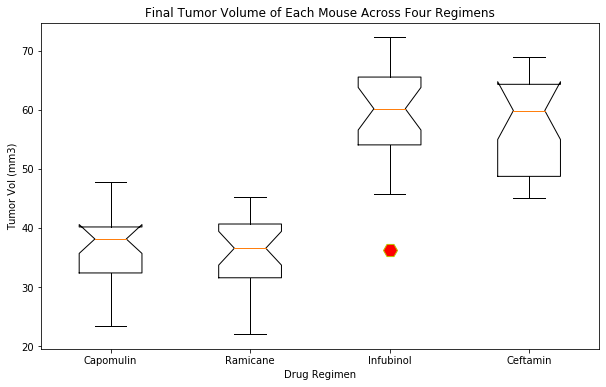

In [63]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest: Capomulin, Ramicane, Infubinol, and Ceftamin. 
four_drugs_list = ['Capomulin', 'Ramicane','Infubinol', 'Ceftamin' ]

data_for_boxplot = []

for item in four_drugs_list:
    data_for_boxplot.append(list(pivot_four_drugs_df[item].dropna()))

# generate a box and whisker plot and highlight any potential outliers in the plot by changing their color and style.
red_diamond = dict(markerfacecolor='r', marker='H', markersize=14,
                  linestyle='none', markeredgecolor='y')
data = data_for_boxplot
fig5, ax5 = plt.subplots(figsize=(10,6))
ax5.set_title('Final Tumor Volume of Each Mouse Across Four Regimens')
ax5.set_xlabel('Drug Regimen')
ax5.set_ylabel('Tumor Vol (mm3)')

ax5.boxplot(data, flierprops=red_diamond, notch=1)
plt.xticks([1,2,3,4], four_drugs_list)
plt.show()


## Line and scatter plots

In [66]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Creating a new Data Frame for the drug regiment Capomulin 
capomulin_df = merge_data.loc[merge_data['Drug Regimen'] == 'Capomulin']
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [81]:
# Choosing a random mouse treated with Capomulin
capomulin_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 'b128']
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight 
# and average tumor volume for the Capomulin regimen